<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day07_Weighted_kNN_and_Graphplot_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day07
## Weighted k-NN, Graph Plot, Metrics

#### CS167: Machine Learning, Spring 2024

Thursday, February 22nd, Spring 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)

# Admin Stuff

You should be working on:
- Heads up that **Quiz #1 is live, due Wednesday 2/28 by 11:59am**.
    - To be completed individually
    - Only one chance to hit 'submit'
    - Cite any materials that you use outside of class
- [Notebook #3](https://github.com/alimoorreza/CS167-SP24-Notebook-3/tree/main) is released today, due next Thursday 2/29/24 by 11:59pm.

# ✨ New Material

In [ ]:
#run this cell if you're using Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/vehicles.csv')
pd.set_option('display.max_columns', 100)
iris = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/irisData.csv')



<ipython-input-3-4bfc151bc0e9>:5: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/vehicles.csv')


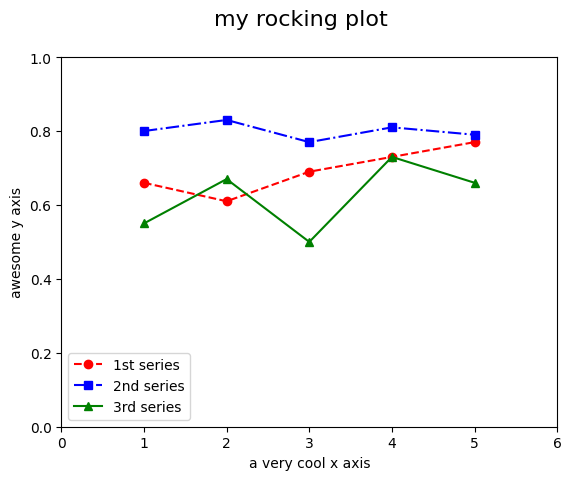

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#define our data
xvals   = [1,2,3,4,5]
series1 = [0.66,0.61,0.69,0.73,0.77]
series2 = [0.8,0.83,0.77,0.81,0.79]
series3 = [0.55,0.67,0.5,0.73,0.66]

#add titles to axis and graph
plt.suptitle('my rocking plot', fontsize=16)
plt.xlabel('a very cool x axis')
plt.ylabel('awesome y axis')

#plot the data
plt.plot(xvals, series1, 'ro--', label='1st series')
plt.plot(xvals, series2, 'bs-.', label='2nd series')
plt.plot(xvals, series3, 'g^-',  label='3rd series')
plt.legend() #plt.legend(loc='lower right', shadow=True)
plt.axis([0,6,0,1]) #[x_min, x_max, y_min, y_max]
plt.show()

## Use markers to differentiate your series:

In [ ]:
%%html
<iframe src="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" width="1500" height="500"></iframe>

# A simple example:

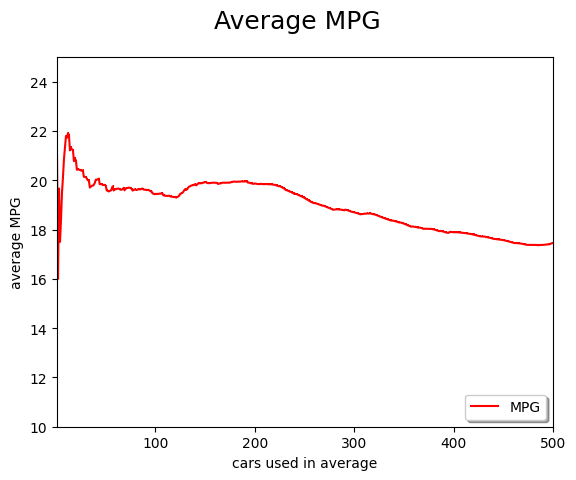

In [ ]:
gas_vehicles = data[data['fuelType']=='Regular']

# a silly function that returns the average MPG for the first k cars in the df
def getAverageMPG(data, k):
    return data["comb08"].iloc[0:k].mean()

number_of_points = 500

#populate the series list
series = []
for i in range(1, number_of_points):
    val = getAverageMPG(gas_vehicles, i)
    series.append(val)

#plot it!
xvals = range(1, number_of_points)
plt.suptitle('Average MPG', fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('average MPG')
plt.plot(xvals, series, 'r,-', label='MPG')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, number_of_points, 10,25])
plt.show()

# 💬 Group Exercise #1:

Given the code from the previous slide:
- change the number of points to 20
- change the line to green triangles
- also plot the median (red dots)

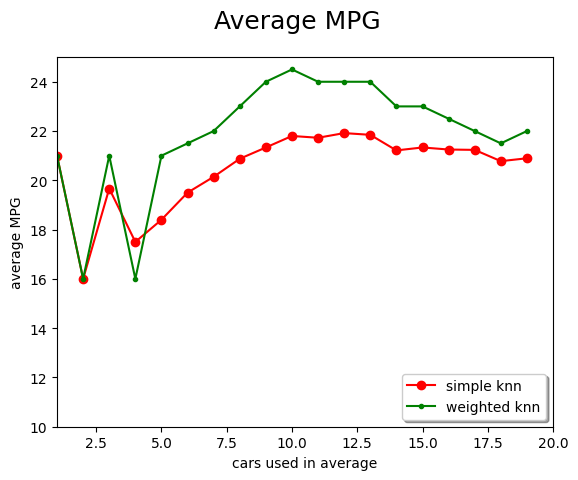

In [ ]:
import matplotlib.pyplot as plt
# make the changes above to lead to a graph that looks like the one below:
gas_vehicles = data[data['fuelType']=='Regular']

# a silly function that returns the average MPG for the first k cars in the df
def getAverageMPG(data, k):
    return data["comb08"].iloc[0:k].mean()


def getMedianMPG(data, k):
    return data["comb08"].iloc[0:k].median()

number_of_points = 20

#populate the series list
series = []
series_median = []
for i in range(1, number_of_points):
    val = getAverageMPG(gas_vehicles, i)
    val_median = getMedianMPG(gas_vehicles, i)
    series.append(val)
    series_median.append(val_median)

#plot it!
xvals = range(1, number_of_points)
plt.suptitle('Average MPG', fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('average MPG')
plt.plot(xvals, series, 'ro-', label='simple knn')
# TBD
plt.plot(xvals, series_median, 'g.-', label='weighted knn')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, number_of_points, 10,25])
plt.show()

# How do we know if our model is a 'good' model?

We want to know how good our models are at making predictions... how can we test it?

Examples:
- what k-value should we use in knn algorithm?
- what is the effect on accuracy if I normalize the data?
- Should I use a weighted knn algorithm or a normal knn?

## Evaluation of Machine Learning Algorithms:

We want to know how good our model is at making predictions. How can we test it?

__Option 1:__ Deploy the model in a live setting and see how it does on new examples.

__Option 2:__ Run each of our training examples through the model and see how many it gets correct

__Option 3:__ Cross-Validation - set aside some of your training examples to be used for testing.
- don't use testing examples when you train the model, only the rest that were left over. Why?

## Cross-Validation

Don't train the model on the testing data!

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/images/day04_cross_validation.png" width=600/>
</div>

## Cross-Validation Code:

A good rule of thumb is that we like to train our model with 80% of the given data examples (training set), and test it on 20% of the given data examples (training set).

Splitting datasets into training and testing sets with a Pandas DataFrame:

In [ ]:
import pandas as pd
import numpy as np


#shuffle the iris "sampling" the full set in random order
shuffled_data = iris.sample(frac=1, random_state=41)

# set up training and testing set
test_data = shuffled_data.iloc[0:20] #test on the first 20 rows of shuffled
train_data = shuffled_data.iloc[20:] #train on the rest
train_data.shape

(130, 5)

## Cross-Validation Metrics:

When doing cross-validation, how do we tell how well our model performed?

How can we measure it?

- depends on the task and what we want to know.

### Classification metrics are different than regression metrics

## Classification Metrics: `Accuracy`

__Accuracy__: The fraction of test examples your model predicted correctly

*Example*: 17 out of 20 = 0.85 accuracy